# 1.Load libraries

In [1]:
options(warn=-1)
library(ggplot2)  
library(dplyr)
library(readr)
library(lattice)



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
library(readr)
dataset <- read_csv("dataset_bank.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  Attrition_Flag = col_character(),
  Gender = col_character(),
  Education_Level = col_character(),
  Marital_Status = col_character(),
  Income_Category = col_character(),
  Card_Category = col_character()
)
See spec(...) for full column specifications.


In [3]:
dataset<-dataset%>%
dplyr:: filter(Months_on_book>0)%>%
dplyr:: filter(Months_on_book<500)


In [4]:
dataset$CLIENTNUM<-NULL

In [5]:
dataset_char= dplyr::select_if(dataset, is.character)

In [6]:
# Label encoder

# https://www.pluralsight.com/guides/encoding-data-with-r
dataset_char$Attrition_Flag <- ifelse(dataset_char$Attrition_Flag == "Existing Customer",0,1)
# table(dataset$Attrition_Flag)
dataset_char$Gender <- ifelse(dataset_char$Gender == "M",0,1)


In [7]:
dataset_char_label<-dataset_char[1:2]

In [8]:
# One hot encoding
library(caret)
dataset_one_hot<-dataset_char[3:6]


dmy <- dummyVars(" ~ .", data = dataset_one_hot, fullRank = T)
dat_transformed <- data.frame(predict(dmy, newdata = dataset_one_hot))


Loading required package: lattice


In [9]:
dataset_numeric= dplyr::select_if(dataset, is.numeric)
# calculate the pre-process parameters from the dataset
preprocessParams <- preProcess(dataset_numeric, method=c("range"))
# summarize transform parameters
print(preprocessParams)
# transform the dataset using the parameters
transformed <- predict(preprocessParams,dataset_numeric)
# summarize the transformed dataset
summary(transformed)

Created from 10075 samples and 14 variables

Pre-processing:
  - ignored (0)
  - re-scaling to [0, 1] (14)



  Customer_Age    Dependent_count  Months_on_book   Total_Relationship_Count
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000          
 1st Qu.:0.3191   1st Qu.:0.2000   1st Qu.:0.4186   1st Qu.:0.4000          
 Median :0.4255   Median :0.4000   Median :0.5349   Median :0.6000          
 Mean   :0.4326   Mean   :0.4692   Mean   :0.5332   Mean   :0.5624          
 3rd Qu.:0.5532   3rd Qu.:0.6000   3rd Qu.:0.6279   3rd Qu.:0.8000          
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000          
 Months_Inactive_12_mon Contacts_Count_12_mon  Credit_Limit    
 Min.   :0.0000         Min.   :0.0000        Min.   :0.00000  
 1st Qu.:0.3333         1st Qu.:0.3333        1st Qu.:0.03368  
 Median :0.3333         Median :0.3333        Median :0.09395  
 Mean   :0.3901         Mean   :0.4087        Mean   :0.21729  
 3rd Qu.:0.5000         3rd Qu.:0.5000        3rd Qu.:0.29102  
 Max.   :1.0000         Max.   :1.0000        Max.   :1.00000  
 Total_Revolv

In [10]:
dataset_transformed<-cbind(dataset_char_label,transformed,dat_transformed)

In [11]:
head(dataset_transformed)

Attrition_Flag,Gender,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Marital_StatusSingle,Marital_StatusUnknown,Income_Category.40K....60K,Income_Category.60K....80K,Income_Category.80K....120K,Income_CategoryLess.than..40K,Income_CategoryUnknown,Card_CategoryGold,Card_CategoryPlatinum,Card_CategorySilver
0,0,0.4042553,0.6,0.6046512,0.8,0.1666667,0.5000000,0.34018992,0.3087008,...,0,0,0,1,0,0,0,0,0,0
0,1,0.4893617,1.0,0.7209302,1.0,0.1666667,0.3333333,0.20611167,0.3432658,...,1,0,0,0,0,1,0,0,0,0
0,0,0.5319149,0.6,0.5348837,0.6,0.1666667,0.0000000,0.05984999,0.0000000,...,0,0,0,0,1,0,0,0,0,0
0,1,0.2978723,0.8,0.4883721,0.4,0.6666667,0.1666667,0.05667565,1.0000000,...,0,1,0,0,0,1,0,0,0,0
0,0,0.2978723,0.6,0.1860465,0.8,0.1666667,0.0000000,0.09909093,0.0000000,...,0,0,0,1,0,0,0,0,0,0
0,0,0.3829787,0.4,0.5348837,0.4,0.1666667,0.3333333,0.07774724,0.4954311,...,0,0,1,0,0,0,0,0,0,0


In [12]:
str(dataset_transformed)

'data.frame':	10075 obs. of  33 variables:
 $ Attrition_Flag               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Gender                       : num  0 1 0 1 0 0 0 0 0 0 ...
 $ Customer_Age                 : num  0.404 0.489 0.532 0.298 0.298 ...
 $ Dependent_count              : num  0.6 1 0.6 0.8 0.6 0.4 0.8 0 0.6 0.4 ...
 $ Months_on_book               : num  0.605 0.721 0.535 0.488 0.186 ...
 $ Total_Relationship_Count     : num  0.8 1 0.6 0.4 0.8 0.4 1 0.2 0.8 1 ...
 $ Months_Inactive_12_mon       : num  0.167 0.167 0.167 0.667 0.167 ...
 $ Contacts_Count_12_mon        : num  0.5 0.333 0 0.167 0 ...
 $ Credit_Limit                 : num  0.3402 0.2061 0.0598 0.0567 0.0991 ...
 $ Total_Revolving_Bal          : num  0.309 0.343 0 1 0 ...
 $ Avg_Open_To_Buy              : num  0.3451 0.2141 0.0989 0.023 0.1366 ...
 $ Total_Amt_Chng_Q4_Q1         : num  0.393 0.454 0.764 0.414 0.64 ...
 $ Total_Trans_Amt              : num  0.0353 0.0435 0.0766 0.0368 0.017 ...
 $ Total_Trans_Ct           

In [13]:
dataset_transformed$Attrition_Flag<-as.factor(dataset_transformed$Attrition_Flag)

## Classification models

In [14]:
dataset <- dataset_transformed
x <- dataset[,2:33]
y <- dataset[,1]


# 2.Testing diffrent models

In [14]:
library(caret)
library(caretEnsemble)
library(mlbench)


Attaching package: 'caretEnsemble'

The following object is masked from 'package:ggplot2':

    autoplot



# 2.1 C5 Algorithm

In [16]:
trainControl <- trainControl(method="repeatedcv", number=10, repeats=3)
seed <- 7
metric <- "Accuracy"
# C5.0
set.seed(seed)
fit.c50 <- train(Attrition_Flag~., data=dataset_transformed, method="C5.0", metric=metric,
trControl=trainControl)


In [17]:
fit.c50

C5.0 

10075 samples
   32 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 9067, 9067, 9067, 9068, 9067, 9068, ... 
Resampling results across tuning parameters:

  model  winnow  trials  Accuracy   Kappa    
  rules  FALSE    1      0.9496770  0.8084200
  rules  FALSE   10      0.9691975  0.8846497
  rules  FALSE   20      0.9707856  0.8902905
  rules   TRUE    1      0.9501397  0.8101788
  rules   TRUE   10      0.9683710  0.8820831
  rules   TRUE   20      0.9698934  0.8870903
  tree   FALSE    1      0.9446474  0.7908789
  tree   FALSE   10      0.9678403  0.8772988
  tree   FALSE   20      0.9699579  0.8854543
  tree    TRUE    1      0.9457721  0.7958880
  tree    TRUE   10      0.9663194  0.8715377
  tree    TRUE   20      0.9687345  0.8808436

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were trials = 20, model = rules and
 winnow 

# 2.2 Stochastic Gradient Boosting

In [18]:
# Stochastic Gradient Boosting
set.seed(seed)
fit.gbm <- train(Attrition_Flag~., data=dataset_transformed, method="gbm", metric="Accuracy",
trControl=trainControl, verbose=FALSE)

In [19]:
fit.gbm

Stochastic Gradient Boosting 

10075 samples
   32 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 9067, 9067, 9067, 9068, 9067, 9068, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  Accuracy   Kappa    
  1                   50      0.8989230  0.5189541
  1                  100      0.9209911  0.6521687
  1                  150      0.9303216  0.7018687
  2                   50      0.9267485  0.6854615
  2                  100      0.9507355  0.8016938
  2                  150      0.9585439  0.8367797
  3                   50      0.9431255  0.7675181
  3                  100      0.9587423  0.8379882
  3                  150      0.9654257  0.8661343

Tuning parameter 'shrinkage' was held constant at a value of 0.1

Tuning parameter 'n.minobsinnode' was held constant at a value of 10
Accuracy was used to select the optimal model using the largest value.
The final

# 2.3 Random Forest

In [21]:
fit.rf <- train(Attrition_Flag~., data=dataset_transformed, method="rf", trControl=trainControl)

In [22]:
fit.rf

Random Forest 

10075 samples
   32 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 9066, 9067, 9067, 9067, 9068, 9068, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.9234406  0.6574254
  17    0.9656900  0.8689609
  32    0.9626463  0.8580475

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 17.

# 2.4 КNN

In [25]:
fit.knn <- train(Attrition_Flag~., data=dataset_transformed, method="knn", trControl=trainControl)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [26]:
fit.knn

k-Nearest Neighbors 

10075 samples
   32 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 9067, 9068, 9068, 9068, 9067, 9068, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.8591571  0.3049829
  7  0.8612743  0.2879318
  9  0.8604791  0.2621685

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 7.

# 2.5 CART

In [28]:
fit.cart <- train(Attrition_Flag~., data=dataset_transformed, method="rpart", trControl=trainControl)

In [29]:
fit.cart

CART 

10075 samples
   32 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 9067, 9068, 9068, 9066, 9068, 9067, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.03848541  0.9070973  0.6374097
  0.07324643  0.8963758  0.5726022
  0.16635630  0.8612432  0.2409417

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.03848541.

# 2.6 SVM

In [31]:
fit.svm <- train(Attrition_Flag~., data=dataset_transformed, method="svmRadial", trControl=trainControl)

In [32]:
fit.svm

Support Vector Machines with Radial Basis Function Kernel 

10075 samples
   32 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 9068, 9068, 9068, 9067, 9067, 9067, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.9062689  0.5789638
  0.50  0.9138785  0.6271164
  1.00  0.9225472  0.6738860

Tuning parameter 'sigma' was held constant at a value of 0.01974523
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.01974523 and C = 1.

# 2.7 Summarize results and visualisation

In [48]:
boostingResults <- resamples(list(c5.0=fit.c50, gbm=fit.gbm,RF=fit.rf,KNN=fit.knn,CART=fit.cart,SVM=fit.svm))
summary(boostingResults)


Call:
summary.resamples(object = boostingResults)

Models: c5.0, gbm, RF, KNN, CART, SVM 
Number of resamples: 30 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
c5.0 0.9612711 0.9667329 0.9712302 0.9707856 0.9739583 0.9821251    0
gbm  0.9553128 0.9613095 0.9652605 0.9654257 0.9692460 0.9751984    0
RF   0.9523810 0.9625405 0.9652605 0.9656900 0.9692384 0.9762141    0
KNN  0.8530288 0.8574618 0.8605461 0.8612743 0.8656902 0.8728898    0
CART 0.8887786 0.9012158 0.9066997 0.9070973 0.9107143 0.9285005    0
SVM  0.9056604 0.9168942 0.9221230 0.9225472 0.9294935 0.9355159    0

Kappa 
          Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
c5.0 0.8561940 0.8776855 0.8923665 0.8902905 0.9004561 0.9320951    0
gbm  0.8306722 0.8497638 0.8652155 0.8661343 0.8796765 0.9034882    0
RF   0.8170751 0.8580274 0.8666210 0.8689609 0.8833734 0.9108683    0
KNN  0.2276582 0.2654673 0.2873990 0.2879318 0.3028712 0.3721028    0
CART 0.5497501 0.6161877 

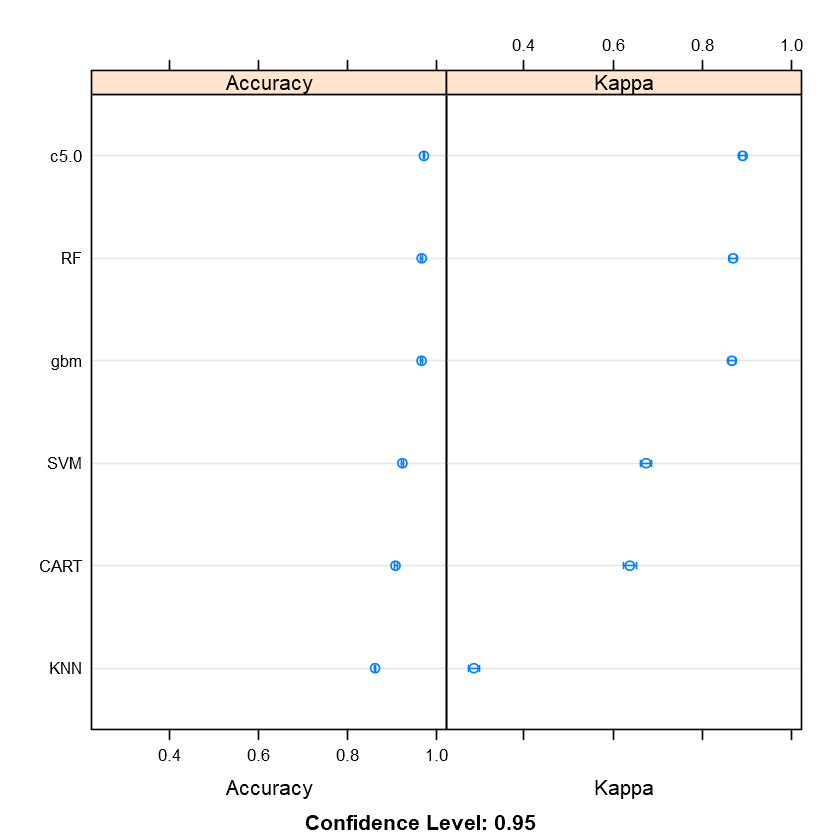

In [49]:
dotplot(boostingResults)

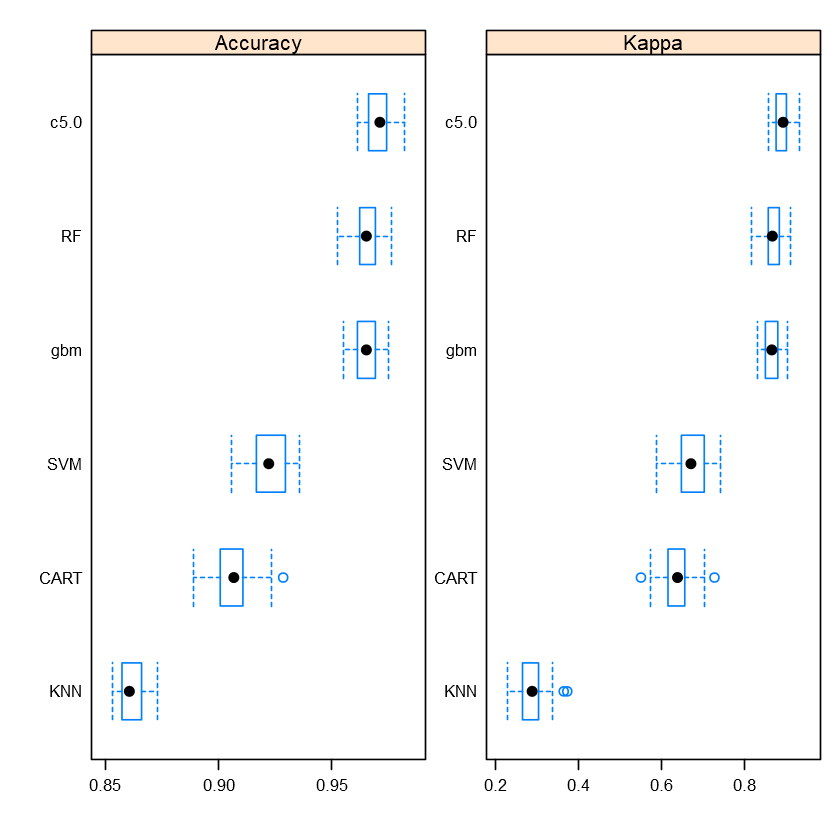

In [42]:
# box and whisker plots to compare models
scales <- list(x=list(relation="free"), y=list(relation="free"))
bwplot(boostingResults, scales=scales)

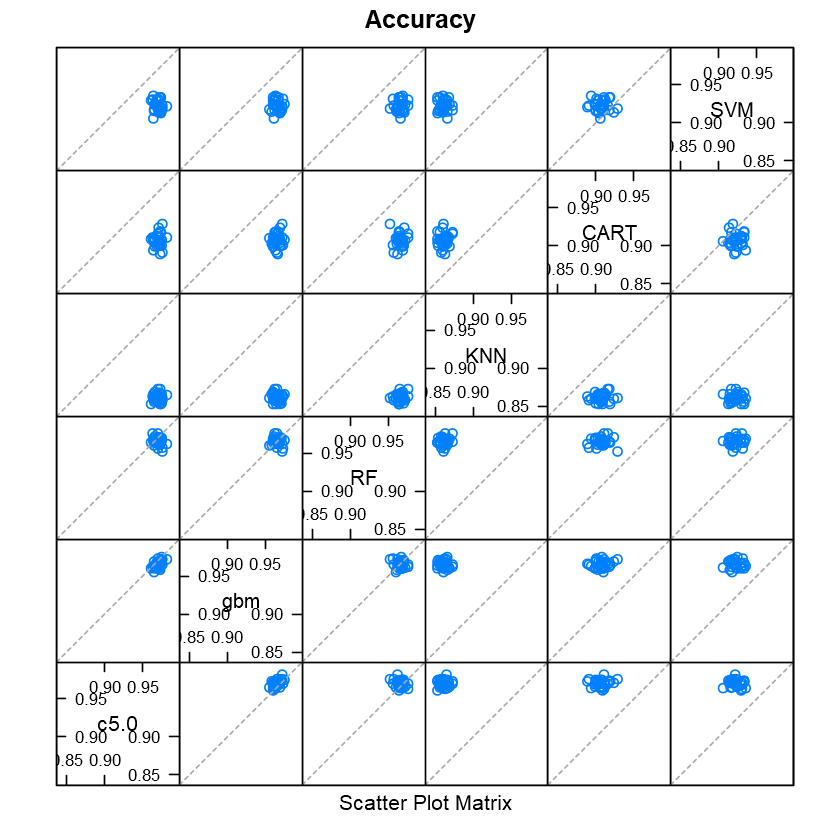

In [44]:
splom(boostingResults)

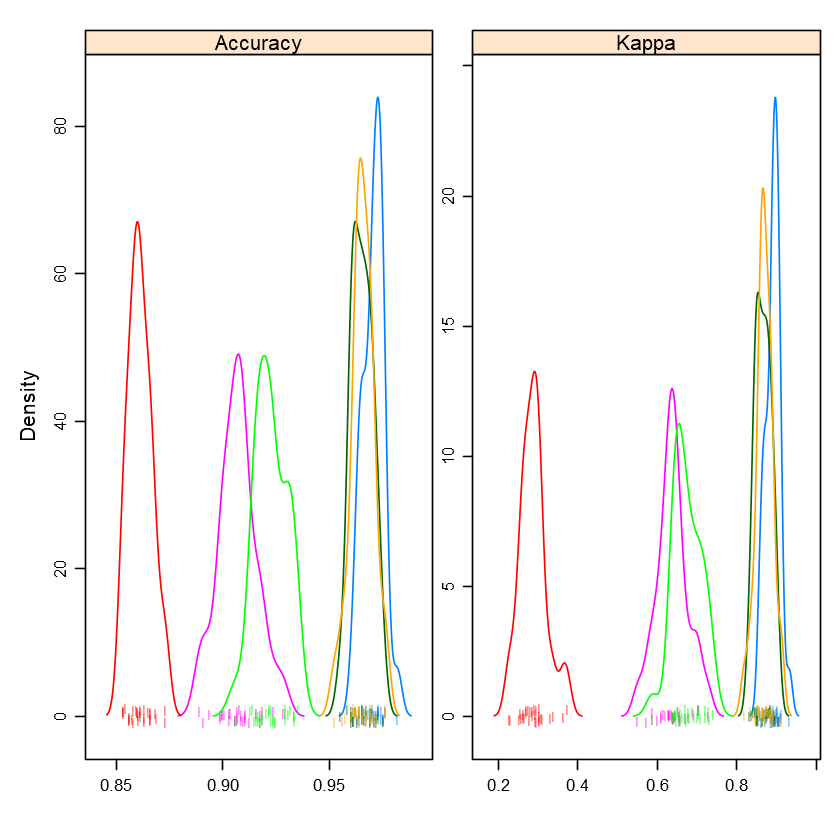

In [47]:
scales <- list(x=list(relation="free"), y=list(relation="free"))
densityplot(boostingResults, scales=scales, pch = "|")
